# Workshop 4: Python Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: What do you Mean?

Create an array of 1000 random numbers with a Poisonnian distribution. Plot a histogram of your results. Then, calculate the mean and standard deviation of your distribution using both the built in python functions and with the known formulas for these values. Do your calculations match?

Numpy Mean: 5.163
Numpy Std: 2.2339272593350037
Mean: 5.163
Std: 31.622776601683793


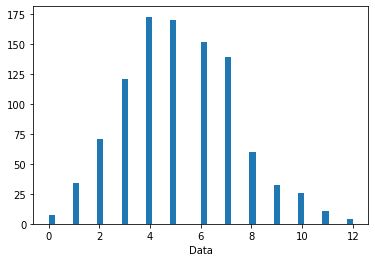

In [6]:
x = np.random.poisson(5, 1000)
N = 1000
mean_np = np.mean(x)
std_np = np.std(x)

mean = np.sum(x)/N
std = np.sqrt(1000)

plt.hist(x, 50)
plt.xlabel('Data')

print('Numpy Mean:', mean_np)
print('Numpy Std:', std_np)
print('Mean:', mean)
print('Std:', std)

## Exercise 2: Elemental Uncertainty

Pick 5 elements on the periodic table that have known isotopes (ex. Hydrogen has Deuterium, Carbon has Carbon 14, etc.). List the isotopes, along with their atomic mass, for each of your chosen elements. Then, create a scatterplot of atomic mass vs atomic number for your chosen elements, with error bars as determined by the variance of atomic masses that appear in the isotopes. Be sure to properly label your plot.

Text(0, 0.5, 'Atomic Mass')

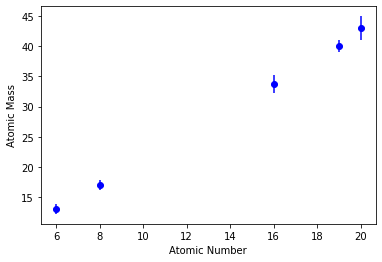

In [4]:
O = [16, 17, 18]
C = [12, 13, 14]
S = [32, 33, 34, 36]
Ca = [40, 42, 43, 44, 46]
K = [39, 41]

mass = [np.mean(O), np.mean(C), np.mean(S), np.mean(Ca), np.mean(K)]
sig = [np.std(O), np.std(C), np.std(S), np.std(Ca), np.std(K)]
num = [8, 6, 16, 20, 19]

plt.errorbar(num, mass, xerr=0, yerr=sig, fmt ='bo')
plt.xlabel('Atomic Number')
plt.ylabel('Atomic Mass')

## Exercise 3: Polynomial Fitting

The code in the cell immediately below will generate some data and store it an array of size `(500,3)` where the first column is $x$ values, the second column is the $y$ values, the third column is the uncertainty in each value. Use the techniques above to a quadratic model of the form
$$y = a_0 + a_1 x + a_2 x^2$$

Plot the data and your best fit curve with error and print out the values and their uncertainties

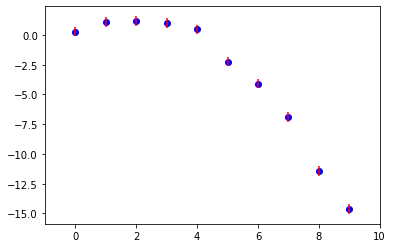

In [13]:
# Generate artificial data for Exercise 6 and plot it
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
%matplotlib inline

# Generate artificial data = quadratic function with a0 = 0, a1=1, a2 = -0.3
# plus some noise.
a0 = 0.5
a1 = 1
a2 = -0.3
sig = 0.4
Npoints = 10

xdata = np.arange(0,Npoints,1.)
ydata = a0 + a1 * xdata + a2 * xdata **2 + sig * np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

a0= 0.256+/-0.314
a1=-0.300+/-0.163
a2=-0.321+/-0.017
chi^2 =  7.69
chi^2/d.f.= 1.10


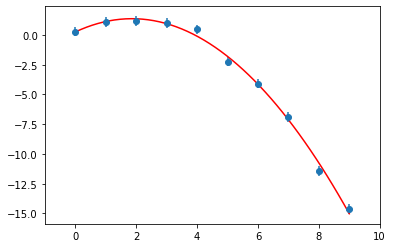

In [15]:
def model(x, a0, a1, a2):
    return a0 + a1*x + a2*(x**2)


par0    = np.array([0.5, -0.3, 0.2]) # initial guess for parameters
par, cov = fitter.curve_fit(model, xdata, ydata, par0, sigma, absolute_sigma=True)

#find coefficient values
a0 = par[0]
ea0 = np.sqrt(cov[0,0])
print('a0={0:6.3f}+/-{1:5.3f}'.format(a0,ea0))
a1 = par[1]
ea1 = np.sqrt(cov[1,1])
print('a1={0:6.3f}+/-{1:5.3f}'.format(a2,ea1))
a2 = par[2]
ea2 = np.sqrt(cov[2,2])
print('a2={0:6.3f}+/-{1:5.3f}'.format(a2,ea2))


# compute reduced chi2
chi_squared = np.sum(((model(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,Npoints)
xfit = np.linspace(0,Npoints-1.,50)
plt.plot(xfit,model(xfit,par[0],par[1],par[2]),'r-')
plt.show()

## Exercise 4: Normal Distributions

1. Generate $N=100$ random numbers, Gaussian-distributed with $\mu=0$ and $\sigma=1$. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation, and the error on the mean. Error on the Mean = $\frac{\sigma}{\sqrt{N}}$
1. Compute the median of this distribution
1. Now find the means, standard deviations, and errors on the means for each of the $M=1000$ experiments of $N=100$ measurements each. Plot a histogram of the means. Is it consistent with your calculation of the error on the mean for $N=100$ ? About how many experiments yield a result within $1\sigma$ of the true mean of 0 ? About how many are within $2\sigma$ ? Is this what you expected?
1. Now repeat question 5 for $N=10,50,1000,10000$. Plot a graph of the standard deviation of the distribution of the means vs $N$.

/tmp/ipykernel_24/1489176751.py:12: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print('Mean = {0:5.2f}'.format(sp.mean(a)))
/tmp/ipykernel_24/1489176751.py:18: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  print ('Median = {0:5.2f}'.format(sp.median(a)))


Mean =  0.16
Error on the Mean =  0.10
Standard deviation = 1.049
The mean is about zero and the standard deviation is about 1 which is what I expected
Median =  0.14
The Mean Given By 1000 trials of 100 measurements (0.36284) 
 within the error on the mean for just 100 measurments (+/- 0.10493).
The values found within one standard deviation (68.1%) and 
 two standard deviations (95.4%) are roughly close to the expected values 
68% & 95%.
Within one, two standard deviations for N=10: (68.7, 95.39999999999999)
Within one, two standard deviations for N=50: (68.0, 95.0)
Within one, two standard deviations for N=1000: (66.7, 95.89999999999999)
Within one, two standard deviations for N=10000: (67.10000000000001, 95.39999999999999)
As N increases the fractions get closer to the expected values.
The plot of RMS vs N makes sense as more measurements should yield a smaller standard deviation.


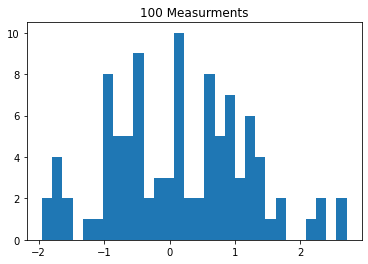

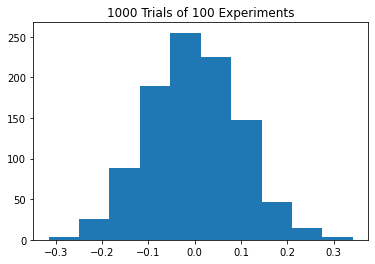

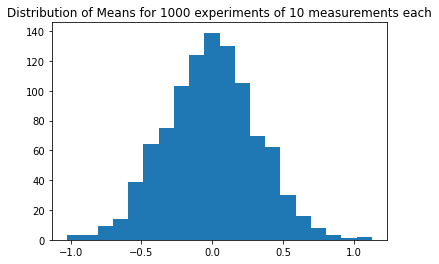

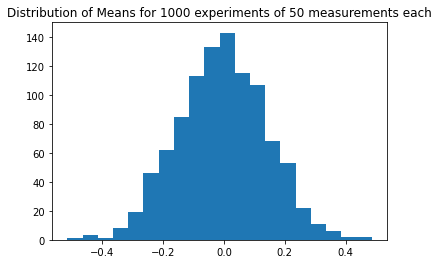

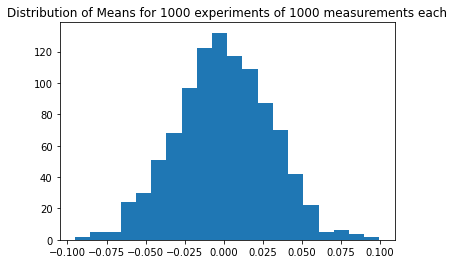

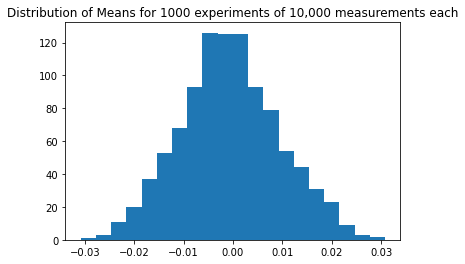

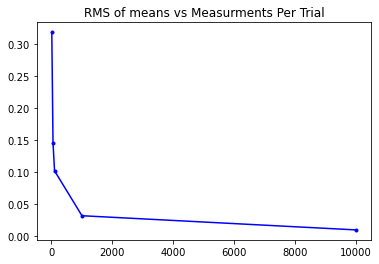

In [5]:
import scipy as sp
#1 Generate Random Numbers
a = np.random.standard_normal(size=100)

#2 Plot Histogram
plt.figure()
n, bins, patches = plt.hist(a, 30)
plt.title('100 Measurments')

#3 Compute Mean, its error and standard deviation
mean_error = np.std(a)/np.sqrt(100)
print('Mean = {0:5.2f}'.format(sp.mean(a)))
print('Error on the Mean = {0:5.2f}'.format(mean_error))
print('Standard deviation = {0:5.3f}'.format(np.std(a)))
print('The mean is about zero and the standard deviation is about 1 which is what I expected')

#4 Compute Median
print ('Median = {0:5.2f}'.format(sp.median(a)))

#5 
def stat(N): ##Define function for taking N measurements
    b = np.random.standard_normal(size=N)
    mn = np.mean(b)
    sd = np.std(b)
    mn_er = sd/np.sqrt(len(b))
    return mn, sd, mn_er
def exp(N,M): ##Define functions for doing M experiments of N measurements
    Means = []
    std = []
    errors = []
    for i in range(0,M):
        n = stat(N)
        Means.append(n[0])
        std.append(n[1])
        errors.append(n[2])
    return Means, std, errors
msr = exp(100, 1000)[0]

plt.figure()
n, bins, patches = plt.hist(msr, 10)
plt.title('1000 Trials of 100 Experiments')

total_mean = np.mean(exp(100, 1000))
print('The Mean Given By 1000 trials of 100 measurements ({:.5f}) \n within the error on the mean for just 100 measurments (+/- {:.5f}).'.format(total_mean, mean_error))

##find values within 1 and 2 standard deviations
sd = np.std(msr)
mn = 0

sp1, sm1 = mn + sd, mn - sd
sp2, sm2 = mn + 2*sd, mn - 2*sd

std1 = []
for val in range(len(msr)):
    if msr[val] >= sm1 and msr[val] <= sp1:
        std1.append(msr[val])
std2 = []
for val in range(len(msr)):
    if msr[val] >= sm2 and msr[val] <= sp2:
        std2.append(msr[val])
        
frac1s = len(std1)/len(msr)
frac2s = len(std2)/len(msr)

print('The values found within one standard deviation ({:.1f}%) and \n two standard deviations ({:.1f}%) are roughly close to the expected values \n68% & 95%.'.format(frac1s*100, frac2s*100))

#6 Vary N
plt.figure()
n, bins, patches = plt.hist(exp(10, 1000)[0], 20)
plt.title('Distribution of Means for 1000 experiments of 10 measurements each')

plt.figure()
n, bins, patches = plt.hist(exp(50, 1000)[0], 20)
plt.title('Distribution of Means for 1000 experiments of 50 measurements each')

plt.figure()
n, bins, patches = plt.hist(exp(1000, 1000)[0], 20)
plt.title('Distribution of Means for 1000 experiments of 1000 measurements each')

plt.figure()
n, bins, patches = plt.hist(exp(10000, 1000)[0], 20)
plt.title('Distribution of Means for 1000 experiments of 10,000 measurements each')




def fraction(means): ##define function to find fraction of values within 1 and 2 standard deviations of 0 for varied N
    mn = 0
    sd = np.std(means)
    sp1, sm1 = mn + sd, mn - sd
    sp2, sm2 = mn + 2*sd, mn - 2*sd
    std1 = []
    for val in range(len(means)):
        if means[val] >= sm1 and means[val] <= sp1:
            std1.append(means[val])
    std2 = []
    for val in range(len(means)):
        if means[val] >= sm2 and means[val] <= sp2:
            std2.append(means[val])
    frac1s = len(std1)/len(means)
    frac2s = len(std2)/len(means)
    return frac1s*100, frac2s*100

print('Within one, two standard deviations for N=10:', fraction(exp(10, 1000)[0]))
print('Within one, two standard deviations for N=50:', fraction(exp(50, 1000)[0]))
print('Within one, two standard deviations for N=1000:', fraction(exp(1000, 1000)[0]))
print('Within one, two standard deviations for N=10000:', fraction(exp(10000, 1000)[0]))
print('As N increases the fractions get closer to the expected values.')

#plot standard deviation VS N
std10 = np.std(exp(10, 1000)[0])
std50 = np.std(exp(50, 1000)[0])
std100 = np.std(exp(100, 1000)[0])
std1000 = np.std(exp(1000, 1000)[0])
std10000 = np.std(exp(10000, 1000)[0])

Std_values = [std10, std50, std100, std1000, std10000]
Nvals = [10, 50, 100, 1000, 10000]

plt.figure()
plt.plot(Nvals, Std_values, 'b.-')
plt.title('RMS of means vs Measurments Per Trial')
print('The plot of RMS vs N makes sense as more measurements should yield a smaller standard deviation.')

## Exercise 5: Binomial Distribution

The binomial distribution with parameters $n$ and $p$ is the *discrete* probability distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. A typical example is a distribution of the number of *heads* for $n$ coin flips ($p=0.5$) 

The function `np.random.binomial(n,p)` requires two arguments, `n` the number of events in a single trial and `p` the probability of the desired outcome. `size` is another optional keyword argument.
1. Generate an array of outcomes for flipping 1 unbiased coin 10 times.
1. Plot the outcomes in a histogram (0=heads, 1=tails). 
1. Compute mean, standard deviation, and the error on the mean. Is this what you expected?

Mean =  0.60
Error on the Mean =  0.15
Standard deviation = 0.490
The mean falls within .5 with its error so this is what should be expected


/tmp/ipykernel_24/2679561337.py:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print('Mean = {0:5.2f}'.format(sp.mean(x)))


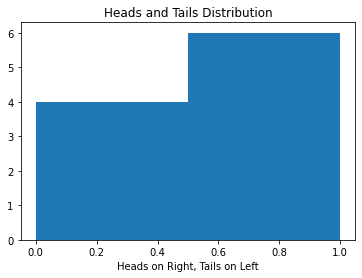

In [7]:
#1 generate array
p = 0.5
x = np.random.binomial(1,p, size=10)
#2 Plot 
n, bins, patches = plt.hist(x, 2)
plt.title('Heads and Tails Distribution')
plt.xlabel('Heads on Right, Tails on Left')
#3 calculate mean, its error, and standard deviation
mean_error = np.std(x)/np.sqrt(10)
print('Mean = {0:5.2f}'.format(sp.mean(x)))
print('Error on the Mean = {0:5.2f}'.format(mean_error))
print('Standard deviation = {0:5.3f}'.format(np.std(x)))
print('The mean falls within .5 with its error so this is what should be expected')

## Exercise 6: Root Finding

Consider a sixth-order polynomial: 

$f(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1$

There is no general formula for the roots of a polynomial of degree 6, but you can compute the roots numerically.

Make a plot of  from  to  and by inspecting it find rough values for the six roots of the polynomial.
Write the code to solve for the positions of all six roots to at least ten decimal places using at least one of the methods dsicussed in class. (you can/should use the built-in functions).
Hint: I would recommend using fsolve in the scipy library

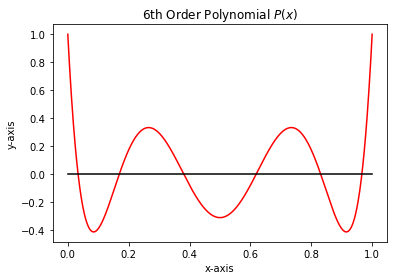

Roots are approximately: 0.05, 0.2, 0.4, 0.65, 0.85, 0.95. Just by examination
of the graph intersecting the y-axis when y = 0.

The values of the roots are: 0.0337652429, 0.1693953068,0.3806904070,
0.6193095930,0.8306046932, 0.9662347571


In [20]:
from scipy.optimize import fsolve
###Your Code Here###

def P(x):
    y = 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
    return y


x = np.linspace(0,1,1000)
zer = np.zeros(1000)
plt.figure()
plt.title("6th Order Polynomial $P(x)$")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,P(x),"r-",label="P(x)")
plt.plot(x,zer,"k-",label="y=0")
plt.show()
print("""Roots are approximately: 0.05, 0.2, 0.4, 0.65, 0.85, 0.95. Just by examination
of the graph intersecting the y-axis when y = 0.""")
#part 2

roots = fsolve(P, [0.0,0.2,0.4,0.6,0.85,0.95])
print("""\nThe values of the roots are: {0:1.10f}, {1:1.10f},{2:1.10f},
{3:1.10f},{4:1.10f}, {5:1.10f}""".format(roots[0],roots[1],roots[2],roots[3],roots[4],roots[5]))

## Exercise 7: Optical Pumping

One of the experiments in the Physics 111B lab is the study of the optical pumping of atomic rubidium. In that experiment, we measure the resonant frequency of a Zeeman transition as a function of the applied current (local magnetic field). Consider a mock data set:
<table border="1" align="center">

<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.14 </td><td> 0.60 </td><td> 1.21 </td><td> 1.94 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 4.68 </td><td> 5.60 </td><td> 6.31 </td><td> 6.78
</td></tr></table>

1. Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line and draw the best-fit line through the data points in the graph.
1. From what they know about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.01$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 
1. Repeat the analysis assuming your partner estimated the uncertainty to be $\sigma(f) = 1$ MHz. What can you conclude from these results?
1. Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.
1. Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.03 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


#1
intercept= 0.040
slope= 3.054


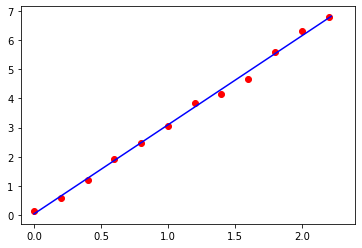

#2
chi2 =  1517.9918414918416  for  10 df
p-value = 0.00
Because the probability is zero, this is not the correct uncertainty
#3
chi2 =  0.15179918414918414  for  10 df
p-value = 1.00
Because the probability is one, this must be the correct uncertainty for this fit.
#4
Computed error For Each Point =  0.12
intercept with errror= 0.040+/-0.067
slope with error= 3.054+/-0.052

#5


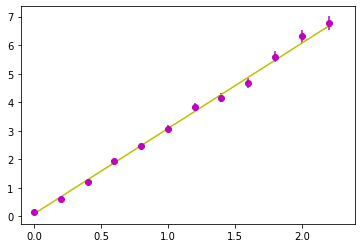

intercept= 0.089+/-0.027
slope= 2.991+/-0.046


In [21]:
import numpy as np
import scipy as sp
from scipy import stats
import scipy.optimize as fitter
import matplotlib.pyplot as plt
%matplotlib inline

#1
print('#1')
#load in data
I = np.array([0, .2, .4, .6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2])
F = np.array([.14, .60, 1.21, 1.94, 2.47, 3.07, 3.83, 4.16, 4.68, 5.60, 6.31, 6.78])

#plot data
plt.plot(I, F, 'ro')

#create fitting model
def model(x, a, b):
    return a + b*x

par0 = np.array([2.5, 0]) # initial guess for parameters
par, cov = fitter.curve_fit(model, I, F, p0=par0)


# decode parameters
a = par[0]
print('intercept={0:6.3f}'.format(a))
b = par[1]
print('slope={0:6.3f}'.format(b))


# overlay plot over data
plt.xlim(-.1,2.4)
xfit = np.linspace(0,2.22,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'b-')
plt.show()

#2
#create array of uncertainties
sigma = np.array([.01, .01, .01, .01, .01, .01, .01, .01, .01, .01, .01, .01])
#find chi-squared
chi_squared = np.sum(((model(I, *par)-F)/sigma)**2)
ndf = len(F)-2
print('#2')
print('chi2 = ',chi_squared,' for ',ndf, 'df')
print('p-value = {0:4.2f}'.format(sp.stats.chi2.sf(chi_squared,ndf))) #calculates probability
print('Because the probability is zero, this is not the correct uncertainty')

#3
#same as 2 with new uncertainty
sigma1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
chi_squared = np.sum(((model(I, *par)-F)/sigma1)**2)
print('#3')
print('chi2 = ',chi_squared,' for ',ndf, 'df')
print('p-value = {0:4.2f}'.format(sp.stats.chi2.sf(chi_squared,ndf)))
print('Because the probability is one, this must be the correct uncertainty for this fit.')


#4
sigCalc = np.sqrt(np.sum(((model(I, *par)-F))**2)/(len(I)-len(par))) #find uncertainty for each y-value
print('#4')
print ('Computed error For Each Point = {0:5.2f}'.format(sigCalc))
#use uncertainties to compute error in parameters
a_error = np.sqrt((sigCalc**2)*np.sum(I**2)/ (len(I)*np.sum(I**2) - (np.sum(I)**2)))
b_error = np.sqrt((sigCalc**2)*len(I)/ (len(I)*np.sum(I**2) - (np.sum(I)**2)))
print('intercept with errror={0:6.3f}+/-{1:5.3f}'.format(a,a_error))
print('slope with error={0:6.3f}+/-{1:5.3f}'.format(b,b_error))
print("")

#5
print('#5')
#create list with new sigma funciton
sig = []
for i in range(len(F)):
    unc = .03 + .03*F[i]
    sig.append(unc)

par01 = np.array([2.5, 0]) # initial guess for parameters
par1, cov1 = fitter.curve_fit(model, I, F, par01, sig, absolute_sigma=True)


plt.figure()
plt.errorbar(I, F, xerr=0, yerr=sig, fmt='mo')
plt.xlim(-.1, 2.4)
xfit = np.linspace(0,2.22,50)
plt.plot(xfit,model(xfit,par1[0],par1[1]),'y-')
plt.show()

#find parameters and uncertainties
c = par1[0]
ec = np.sqrt(cov1[0,0])
print('intercept={0:6.3f}+/-{1:5.3f}'.format(c,ec))
d = par1[1]
ed = np.sqrt(cov1[1,1])
print('slope={0:6.3f}+/-{1:5.3f}'.format(d,ed))